# HW 16-17

# Imports

In [1]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

# HW 16

In [2]:
# Setup: copied from HW 13
data: np.ndarray = pd.read_csv("uspopulation.txt", delimiter=" ").values.astype(np.float64)

years = data[:,0]
pops = data[:,1]

In [3]:
# A
tau = np.linspace(-1, 1, len(years)+1)
tau_pre = tau[:-1]
tau_20 = tau[-1]

In [4]:
# B

# a design matrix is created as follows:
def design_mat(k: int, vec) -> np.ndarray:
    """ copied from HW 13 """
    A = np.stack([np.polynomial.legendre.Legendre.basis(i)(vec) for i in range(k)]).T
    return A

# for example, the design matrix given our data and a monomial basis up to k=11 is:
des_mat = design_mat(11, tau_pre)
pd.DataFrame(des_mat)

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,-1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000
1,1.0,-0.833333,0.541667,-0.196759,-0.119309,0.336372,-0.414476,0.353133,-0.189104,-0.016233,0.195895
2,1.0,-0.666667,0.166667,0.259259,-0.427469,0.305556,-0.017233,-0.240569,0.315790,-0.183822,-0.051370
3,1.0,-0.500000,-0.125000,0.437500,-0.289062,-0.089844,0.323242,-0.223145,-0.073639,0.267899,-0.188229
4,1.0,-0.333333,-0.333333,0.407407,0.012346,-0.333333,0.193416,0.165981,-0.272977,0.024336,0.230266
5,1.0,-0.166667,-0.458333,0.238426,0.274209,-0.273003,-0.145090,0.278912,0.039794,-0.260449,0.046661
6,1.0,0.000000,-0.500000,0.000000,0.375000,0.000000,-0.312500,0.000000,0.273438,0.000000,-0.246094
7,1.0,0.166667,-0.458333,-0.238426,0.274209,0.273003,-0.145090,-0.278912,0.039794,0.260449,0.046661
8,1.0,0.333333,-0.333333,-0.407407,0.012346,0.333333,0.193416,-0.165981,-0.272977,-0.024336,0.230266
9,1.0,0.500000,-0.125000,-0.437500,-0.289062,0.089844,0.323242,0.223145,-0.073639,-0.267899,-0.188229


In [5]:
# C: adapted from HW 13

df = pd.DataFrame(
     {
          "K": [i+1 for i in range(11)],
          "sum of squared error": [0 for i in range(11)],
          "predicted population in 2020": [0 for i in range(11)],
          "condition number": [0 for i in range(11)]
      }
)

# Let's loop to solve
for i, row in df.iterrows():
     k = row["K"]
     A = design_mat(k, tau_pre)
     theta_hat, sse, rank, s = np.linalg.lstsq(A, pops)
     df.loc[i, "sum of squared error"] = sse
     df.loc[i, "predicted population in 2020"] = design_mat(k, np.array([tau_20]))@theta_hat
     df.loc[i, "condition number"] = s[0]/s[-1]
     

# Here are our results
df

## What do you notice?
# I notice that the predicted population for 2020 still fluctuates as in homework 13, but my less, and that similarly, the condition number still increases, but not by as much.

,K,sum of squared error,predicted population in 2020,condition number
0,1,64833.089851,177.340667,1.000000
1,2,1211.729360,314.443621,1.756048
2,3,106.477333,342.047136,2.432760
3,4,105.948478,341.124798,3.311827
4,5,86.107178,332.065503,4.625532
5,6,65.260770,348.063864,6.922458
6,7,64.757088,352.746326,11.415503
7,8,27.127825,267.999303,21.459975
8,9,20.248611,181.742205,47.127184
9,10,7.605490,508.822167,124.648564


# HW 17

In [6]:
# setup

data: np.ndarray = pd.read_csv("bias-variance-trade.txt", delimiter=" ", header=None).values.astype(np.float64)
x1 = data[:, 0]
y1 = data[:, 1]
x2 = data[:, 2]
y2 = data[:, 3]

In [7]:
# A

# let's use the function and methods from HW 13 and 16 (copied/adapted from there)
df = pd.DataFrame(
    {
        "K": [i+1 for i in range(11)],
        "sum of squared error": [0 for i in range(11)],
    }
)

theta_holder_1 = {}

# Let's loop to solve
for i, row in df.iterrows():
    k = row["K"]
    A = design_mat(k, x1)
    theta_hat, sse, rank, s = np.linalg.lstsq(A, y1)
    df.loc[i, "sum of squared error"] = sse
    theta_holder_1[k] = theta_hat

df

,K,sum of squared error
0,1,3.041412
1,2,3.040519
2,3,3.040433
3,4,3.040249
4,5,2.952330
5,6,2.952087
6,7,2.778459
7,8,2.750194
8,9,0.994671
9,10,0.923089


In [8]:
# B

# let's use the function and methods from HW 13 and 16 (copied/adapted from there)
df = pd.DataFrame(
    {
        "K": [i+1 for i in range(11)],
        "sum of squared error": [0 for i in range(11)],
    }
)

theta_holder_2 = {}

# Let's loop to solve
for i, row in df.iterrows():
    k = row["K"]
    A = design_mat(k, x2)
    theta_hat, sse, rank, s = np.linalg.lstsq(A, y2)
    df.loc[i, "sum of squared error"] = sse
    theta_holder_2[k] = theta_hat

df

,K,sum of squared error
0,1,1.331521
1,2,1.301472
2,3,1.239674
3,4,1.225391
4,5,1.110006
5,6,1.103873
6,7,1.025801
7,8,0.864047
8,9,0.479757
9,10,0.477410


(-1.5, 1.5)

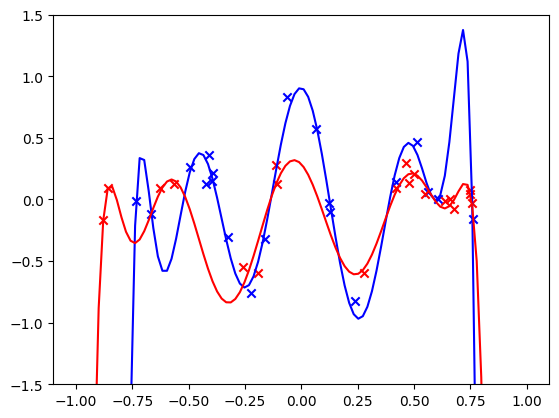

In [9]:
# C

plt.scatter(x1, y1, color = "b", marker="x")
k1_to_plot = 11
bfx1 = np.linspace(-1, 1, 100)
ttp1 = theta_holder_1[k1_to_plot]
atp1 = design_mat(k1_to_plot, bfx1)
bfy1 = atp1@ttp1
plt.plot(bfx1, bfy1, color="b")

plt.scatter(x2, y2, color = "r", marker="x")
k2_to_plot = 11
bfx2 = np.linspace(-1, 1, 100)
ttp2 = theta_holder_2[k2_to_plot]
atp2 = design_mat(k2_to_plot, bfx2)
bfy2 = atp2@ttp2
plt.plot(bfx2, bfy2, color="r")

plt.ylim(-1.5, 1.5)

# How well does one model fit the data used to train the other model? 
# not well -- the models are specific to their datas

# Acknowledgment
Work in this repository and with associated assignments and projects may be adapted or copied from similar files used in my prior academic and industry work (e.g., using a LaTeX file or Dockerfile as a starting point). Those files and any other work in this repository may have been developed with the help of LLM's like ChatGPT. For example, to provide context, answer questions, refine writing, understand function call syntax, and assist with repetitive tasks. In these cases, deliverables and associated work reflect my best efforts to optimize my learning and demonstrate my capacity, while using available resources and LLM's to facilitate the process.


[ChatGPT Conversation](https://chatgpt.com/share/68d71734-51a8-8003-bc65-f01f174b8706)